brm_001
eyk_001
lan_001
roi_001
sse_001

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import neighbors
from sklearn import metrics
import numpy as np
import itertools

## Importing Dataset

In [54]:
dataset = pd.read_csv("rawdata.csv")
dataset = dataset.drop(['SpeakerLabel'], axis = 1)
dataset = dataset.drop(['Gender'], axis = 1)
dataset = dataset.drop(['Word'], axis = 1)
dataset = dataset.drop(['ClassNo'], axis = 1)
dataset = dataset.drop(['Time'], axis = 1)
print(dataset)

data_matrix = dataset.drop(['VowelPhoneme'], axis = 1)
data_labels = dataset['VowelPhoneme']

    VowelPhoneme     Formant1     Formant2     Formant3
0             IY   444.623659  2809.593757  3389.504115
1             AE  1000.117362  1785.756909  2933.149666
2             ER   718.361613  1985.049514  3149.517110
3             IY   593.824486  2738.706465  3328.840620
4             AE   986.417708  1805.294539  3080.968468
..           ...          ...          ...          ...
145           AE   972.530188  1606.190042  2666.531726
146           ER   585.249896  1669.221268  2612.789513
147           IY   319.691652  2357.731836  2820.143564
148           AE   796.434301  1538.121814  3139.960398
149           ER   499.570359  1534.045916  3047.250635

[150 rows x 4 columns]


## Splitting Dataset

In [55]:
def new_dataset():
    data_matrix = dataset.drop(['VowelPhoneme'], axis = 1)
    data_labels = dataset['VowelPhoneme']
    x_train, x_test, y_train, y_test = train_test_split(data_matrix, data_labels, test_size=0.25, shuffle=True)
    return x_train, x_test, y_train, y_test

In [56]:
data_train, data_test, label_train, label_test = new_dataset()

In [88]:
def perform_model(model, data_train, label_train, data_test, label_test, class_labels, cm_normalize=True, print_cm=True, cm_map=plt.cm.Greens):
    # to store results at various phases
    results = dict()
    
    # time at which model starts training
    print('Training KNN model..')
    model.fit(data_train, label_train)
    
    # predict test data
    print('Predicting test data...')
    y_pred = model.predict(data_test)
    test_end_time = datetime.now()
    results['predicted'] = y_pred
    
    
    # confusion matrix
    print('Generating confusion matrix...')
    cm = metrics.confusion_matrix(label_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('-----------------------')
        print('CONFUSION MATRIX')
        print('\n {}'.format(cm))
    
    # plot confusion matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized Confusion Matrix', cmap=cm_map)
    plt.show()
    
    # calculate overall accuracty of the model
    print('Calculating accuracy...')
    accuracy = metrics.accuracy_score(y_true=label_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('-----------------------')
    print('ACCURACY')
    print('\n      {}\n\n'.format(accuracy))
    
    
    # add the trained model to the results
    results['model'] = model
    
    return results

In [89]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [90]:
# function to print the gridsearch Attributes
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('-----------------------')
    print('|    Best Estimator   |')
    print('-----------------------')
    print('\n\t{}\n'.format(model.best_estimator_))
    
    # parameters that gave best results while performing grid search
    print('-----------------------')
    print('|   Best Parameters   |')
    print('-----------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))
    
    # number of cross validation splits
    print('--------------------------------')
    print('|  No of CrossValidation sets  |')
    print('--------------------------------')
    print('\n\tTotal number of cross validation sets: {}\n'.format(model.n_splits_))
    
    # Average cross validated score of the best estimator, from the Grid Search
    print('-----------------------')
    print('|      Best Score     |')
    print('-----------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

Training KNN model..
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s


Predicting test data...
Generating confusion matrix...
-----------------------
CONFUSION MATRIX

 [[ 9  0  0]
 [ 2 13  0]
 [ 0  0 14]]


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


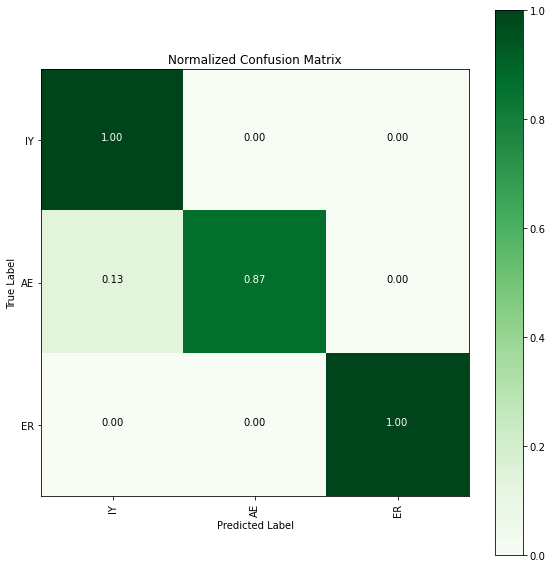

Calculating accuracy...
-----------------------
ACCURACY

      0.9473684210526315




In [91]:
knn_params = {'n_neighbors':[2,3,4,5,6], 'weights': ['uniform','distance'], 'algorithm': ['ball_tree', 'kd_tree','brute']}
labels = ['IY', 'AE', 'ER']
knn_kernel = neighbors.KNeighborsClassifier()
knn_grid = GridSearchCV(knn_kernel, param_grid=knn_params, n_jobs=-1, verbose=1)
knn_grid_results = perform_model(knn_grid, data_train, label_train, data_test, label_test,class_labels=labels)

In [67]:
print_grid_search_attributes(knn_grid_results['model'])

-----------------------
|    Best Estimator   |
-----------------------

	KNeighborsClassifier(algorithm='ball_tree', weights='distance')

-----------------------
|   Best Parameters   |
-----------------------
	Parameters of best estimator : 

	{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}

--------------------------------
|  No of CrossValidation sets  |
--------------------------------

	Total number of cross validation sets: 5

-----------------------
|      Best Score     |
-----------------------

	Average Cross Validate scores of best estimator : 

	0.9731225296442687

